In [184]:
import glob
import os,shutil,sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import time #sleep 用

In [62]:
import pandas as pd

def count_cilumn(count_list):
    #load csv file
    df_kinme=pd.read_csv('U://ROW.csv',index_col=0)
    #init view dir (串再一起)
    label_dir={'sum':[],
             'avg':[],
             'min':[],
             'max':[],
            }
    label_table=pd.DataFrame(label_dir)
    #init varrible
    sum_number=0
    avg_number=0
    sum_list=[]
    #find size
    c_row,c_column=df_kinme.shape
    #Calculation
    for i in range(c_row):
        for j in range(len(count_list)):
            data=df_kinme[count_list[j]]
            sum_list.append(data[i])
            sum_number+=data[i]
            max_number=max(sum_list)
            min_number=min(sum_list)
        avg_number=sum_number/len(count_list)
        
        #add newdata
        step_dir={'sum':[sum_number],
             'avg':[avg_number],
             'min':[min_number],
             'max':[max_number],
            }
        step_table=pd.DataFrame(step_dir)
        label_table=label_table.append(step_table,ignore_index=True)
        
        #create new column
        #df_kinme['SUM']=sum_number
        #df_kinme['AVG']=avg_number
        
        #print log(debug)可省略
        print(sum_list)
        print("加總",sum_number)
        print("平均",avg_number)
        print("最大",max_number)
        print("最小",min_number)
        print("==============")
        #清空重新裝下一批資料
        sum_list.clear()
    #show table
    print(label_table)
    
    #result calculation

In [61]:
#using function
find_list=[]
#跑幾次(改range裡面的數字)
for i in range(15):
    column_name1='L_2mm_'
    #起始(改數字)，i從0開始
    column_name2=i+1
    column_name3='pos'
    column_name=column_name1+str(column_name2)+column_name3
    find_list.append(column_name)
count_cilumn(find_list)

[1518, 1391, 1303, 1298, 1301, 1302, 1298, 1295, 1295, 1294, 1295, 1297, 1294, 1292, 1297]
加總 19770
平均 1318.0
最大 1518
最小 1292
[1508, 1375, 1301, 1294, 1288, 1288, 1287, 1285, 1285, 1286, 1295, 1296, 1295, 1293, 1292]
加總 39438
平均 2629.2
最大 1508
最小 1285
[1525, 1387, 1303, 1301, 1298, 1298, 1297, 1297, 1294, 1294, 1293, 1298, 1293, 1291, 1297]
加總 59204
平均 3946.9333333333334
最大 1525
最小 1291
[1508, 1389, 1311, 1304, 1296, 1294, 1292, 1295, 1286, 1285, 1289, 1293, 1294, 1294, 1293]
加總 78927
平均 5261.8
最大 1508
最小 1285
[1522, 1389, 1302, 1297, 1290, 1289, 1288, 1288, 1285, 1288, 1291, 1298, 1295, 1291, 1293]
加總 98633
平均 6575.533333333334
最大 1522
最小 1285
[1508, 1370, 1302, 1296, 1292, 1288, 1284, 1288, 1295, 1293, 1291, 1296, 1294, 1288, 1285]
加總 118303
平均 7886.866666666667
最大 1508
最小 1284
        sum          avg     min     max
0   19770.0  1318.000000  1292.0  1518.0
1   39438.0  2629.200000  1285.0  1508.0
2   59204.0  3946.933333  1291.0  1525.0
3   78927.0  5261.800000  1285.0  1508.0
4   

## 自己寫的函式庫(匯入使用)

In [3]:
import CompareImageII
import Harr
f1='OG001.jpg'
f2='OG008.jpg'
#一定要"/"，這個方向
file1='Screen/transport/OG/'+f1
file2='Screen/transport/OG/'+f2
print(CompareImageII.CompareAlgo(file1,file2))
  
file3='Screen/transport/'+f1
file4='Screen/transport/'+f2
img1=cv2.imread(file3)
img2=cv2.imread(file4)
print(CompareImageII.calculate(img1,img2))

False
[0.549502]


## 步驟1:將影像切割左邊右邊

In [23]:
def precutting(input_path,output_path):
    try:
        #path='C:\\Users\\2102048\\pythonCV\\Screen\\OG\\43_OG\\'
        Filelist=glob.glob(input_path+'*.jpg')
        #依次讀取陣列裡面的每個檔案，並一一開啟來處理
        for i,f in enumerate(Filelist):
            #開一個檔案
            img=cv2.imread(f)
            #取檔名
            filename=(f.split('\\'))[-1]
            #去除副檔名
            name=filename[:-8]
            #設定座標取左
            #[[605,500],[0,500],[0,0],[605,0]]
            point_left_1=(0,0)
            point_left_2=(605,568)
            crop_left=img[point_left_1[1]:point_left_2[1],point_left_1[0]:point_left_2[0]]
            save_left=name+'_01.jpg'
            cv2.imwrite(output_path+save_left,crop_left)
            #設定座標取右
            #[[1210,500],[605,500],[605,0],[1210,0]]
            point_right_1=(605,0)
            point_right_2=(1210,605)
            crop_right=img[point_right_1[1]:point_right_2[1],point_right_1[0]:point_right_2[0]]
            save_right=name+'_02.jpg'
            cv2.imwrite(output_path+save_right,crop_right)
        print("分割OK")
    except:
        print("分割ERROR")
precutting('C:\\Users\\2102048\\pythonCV\\Screen\\OG\\43_OG\\','Screen\\OG\\temp\\')

分割OK


## 步驟2:裁剪擴增資料function(裁減上下)

In [16]:
#輸入影像、裁剪左上、右下角，進行處理再回傳影像
def cropping_img(fname,point1,point2):
    #print(point1,point2)
    img=cv2.imread(fname)
    cutting_area=img[point1[1]:point2[1],point1[0]:point2[0]]
    return cutting_area
    

In [17]:
#輸入影像、檔名、要不要顯示
#相依cropping_img function
def modify_cropping(img,f,control):
    c_row,c_column,color=img.shape
    #命名
    filename=(f.split('\\'))[-1]
    name=filename[:-7]
    #存檔路徑
    location='Screen/OG/temp/'
    
    #568*650
    #第一種裁減尺寸(裁左方、上方影像)
    point1_1=(20,20)
    point1_2=(c_row,c_column)
    #設定裁切區域
    cutting_1=cropping_img(f,point1_1,point1_2)
    
    save_cutting_1=name+"_03.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_1,cutting_1)
    

    #第二種裁減尺寸(裁減右方、下方影像)
    point2_1=(0,0)
    point2_2=(c_row-10,c_column-10)
    #設定裁切區域
    cutting_2=cropping_img(f,point2_1,point2_2)
    save_cutting_2=name+"_04.jpg"
    cv2.imwrite(location+save_cutting_2,cutting_2)
    
    #第三種
    point3_1=(30,30)
    point3_2=(c_row-10,c_column-10)
    #設定裁切區域
    cutting_3=cropping_img(f,point3_1,point3_2)
    save_cutting_3=name+"_05.jpg"
    cv2.imwrite(location+save_cutting_3,cutting_3)
    #第四種
    point4_1=(0,0)
    point4_2=(c_row-20,c_column-20)
    #設定裁切區域
    cutting_4=cropping_img(f,point4_1,point4_2)
    save_cutting_4=name+"_06.jpg"
    cv2.imwrite(location+save_cutting_4,cutting_4)
    
    #第五種
    point5_1=(20,20)
    point5_2=(c_row-30,c_column-30)
    #設定裁切區域
    cutting_5=cropping_img(f,point5_1,point5_2)
    save_cutting_5=name+"_07.jpg"
    cv2.imwrite(location+save_cutting_5,cutting_5)
    
    #第六種
    point6_1=(20,20)
    point6_2=(c_row-30,c_column-30)
    #設定裁切區域
    cutting_6=cropping_img(f,point6_1,point6_2)
    save_cutting_6=name+"_08.jpg"
    cv2.imwrite(location+save_cutting_6,cutting_6)

    if control==1:
        #顯示
        titles=['cutting(20,0)','cutting(0,20)','cutting(30,0)','cutting(0,30)','cutting(40,0)','cutting(0,40)']
        images=[cutting_1,cutting_2,cutting_3,cutting_4,cutting_5,cutting_6]
        for i in range(len(images)):
            #2row * 3column
            plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.show()
        

## 步驟2:光影擴增資料(亮度、對比)

In [18]:
#輸入HLS影像、光影、對比，進行處理再回傳影像
def hls_image(IMG,lightness,saturation):
    #轉換成4個維度的HLS
    #transfer to float
    processIMG=IMG.astype(np.float32)
    #影像正規化
    f_IMG=processIMG/255.0
    
    #顏色空間轉換BGR->HLS
    hls_img=cv2.cvtColor(f_IMG,cv2.COLOR_BGR2HLS)
    processIMG=np.copy(hls_img)
    
    #調整亮度
    processIMG[:,:,1]=(1+lightness/100.0)*processIMG[:,:,1]
    #正規化到0~1之間，超過1的都等於1，讓pixel的數值都在影像的範圍之內
    processIMG[:,:,1][processIMG[:,:,1]>1]=1
##
    #print(img[:,:,1])
    #print("=============")
##
    #調整飽和度
    processIMG[:,:,2]=(1+saturation/100.0)*processIMG[:,:,2]
    #正規化到0~1之間，超過1的都等於1，讓pixel的數值都在影像的範圍之內
    processIMG[:,:,2][processIMG[:,:,2]>1]=1
##
    #print(img[:,:,1])
##
    # 顏色空間反轉換 HLS -> BGR 
    result_img = cv2.cvtColor(processIMG, cv2.COLOR_HLS2BGR)
    result_img = ((result_img * 255).astype(np.uint8))
    #result_img=cv2.cvtColor(result_img,cv2.COLOR_BGR2GRAY)
    return(result_img)

In [19]:
#輸入影像、檔案路徑名稱、要不要截圖
def modify_lightness_saturation(img,fname,control):
    #取檔名
    filename=(fname.split('\\'))[-1]
    #去除副檔名
    name=filename[:-7]
    #存檔路徑
    location='Screen/OG/temp/'
#//////////////////////////////////////////adjust recipe_1//////////////////////////////////////////
    #調整亮度(多10%)
    lightness=10
    #調整飽和度(多300%)
    saturation=100
    result_img=hls_image(img,lightness,saturation)
    
    #存檔
    save_cutting_1=name+"_09.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_1,result_img)
#//////////////////////////////////////////adjust recipe_2//////////////////////////////////////////
    lightness_2=10
    saturation_2=200
    result_img_2=hls_image(img,lightness_2,saturation_2)
    
    #存檔
    save_cutting_2=name+"_10.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_2,result_img_2)
#//////////////////////////////////////////adjust recipe_3//////////////////////////////////////////
    lightness_3=10
    saturation_3=300
    result_img_3=hls_image(img,lightness_3,saturation_3)

    #存檔
    save_cutting_3=name+"_11.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_3,result_img_3)
    
#//////////////////////////////////////////adjust recipe_4//////////////////////////////////////////
    lightness_4=20
    saturation_4=100
    result_img_4=hls_image(img,lightness_4,saturation_4)
    
    #存檔
    save_cutting_4=name+"_11.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_4,result_img_4)
#//////////////////////////////////////////adjust recipe_5//////////////////////////////////////////
    lightness_5=20
    saturation_5=200
    result_img_5=hls_image(img,lightness_5,saturation_5)

    #存檔
    save_cutting_5=name+"_12.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_5,result_img_5)
    #//////////////////////////////////////////adjust recipe_6//////////////////////////////////////////
    lightness_6=20
    saturation_6=300
    result_img_6=hls_image(img,lightness_6,saturation_6)

    #存檔
    save_cutting_6=name+"_13.jpg"
    #存檔(路徑+檔名.裁切影像)
    cv2.imwrite(location+save_cutting_6,result_img_6)
    
    if control==1:
        #顯示
        titles=['Highr10-100','Highr10-200','Highr10-300','Highr20-100','Highr20-200','Highr20-300']
        images=[result_img,result_img_2,result_img_3,result_img_4,result_img_5,result_img_6]
        for i in range(len(images)):
            #2row * 3column
            plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.show()

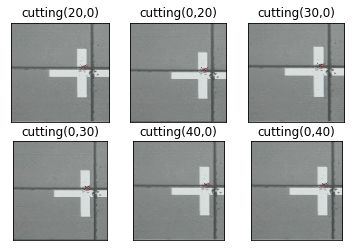

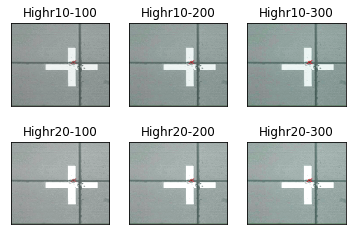

In [20]:
def test_Increment():
    #測試執行結果示意圖
    f='Screen/OG/OK_cutting/16-27-53_Y3MA_Two_07.jpg'
    img=cv2.imread(f)
    #裁剪增量
    modify_cropping(img,f,1)
    #光影增量
    modify_lightness_saturation(img,f,1)
test_Increment()

## 步驟2:使用增量Function

In [21]:
def Use_Increment():
    #在原本分左右的資料夾內，拿原本的影像增量
    path='C:\\Users\\2102048\\pythonCV\\Screen\\OG\\43_ok_cutting\\'
    filelist=glob.glob(path+'*.jpg')
    #568, 605下去裁減
    try:
        for i,f in enumerate(filelist):
            #開一個檔案
            img=cv2.imread(f)
            #進function處理影像
            modify_cropping(img,f,0)
            modify_lightness_saturation(img,f,0)
        print('OK')
    except:
        print("ERROR")
Use_Increment()

OK


## 步驟3:Sikulix後影像前處理(非必要)

In [17]:
#讀進檔案進行預處理
def remove_particle:
    #使用(要先在path之下建立test資料夾)
    path='C:/Users/2102048/pythonCV/Screen/OG/OK_cutting/'
    #讀進所有jpg檔案
    photolist=glob.glob(path+'*.jpg')
    #一張一張處理掉雜質(碎削、對位置藍色x點)
    for i,f in enumerate(photolist):
        filename=f.split("\\")[-1]
        #灰階讀進
        img=cv2.imread(path+filename,0)

        #膨脹
        kernel = np.ones((5,5), np.uint8)
        dilate = cv2.dilate(img, kernel, iterations = 1)

        #降噪(中值濾波)，彌平紅線條
        image_mid_blur =cv2.medianBlur(dilate, 9) 
        cv2.imwrite('Screen/OG/OK_cutting/test/'+filename,dilate)

## (選用) Sikulix 專用資料夾處理

In [4]:
#建立資料夾
def emptydir(dirname):
    if os.path.isdir(dirname):
        shutil.rmtree(dirname)
        print("已刪除重建",dirname,"資料夾")
        sleep(2)
    
    os.mkdir(dirname)
    print("建立",dirname)    
#搬移檔案
def movefile(src_path,des_path):
    for fname in os.listdir (src_path):
        shutil.move(os.path.join(src_path,fname),des_path)

In [70]:
#使用搬移檔案功能，將src_path該層檔案移置des_path
#參數(原始路徑,搬移路徑)
def movefile(src_path,des_path):
    for fname in os.listdir(src_path):
    shutil.move(os.path.join(src_path,fname),des_path)
    
#輸入片號資料夾
panelFile="2021-03-30 15-12-50_Y3VA"
#建立資料夾
emptydir(panelFile)
#建立子資料價
subfile=["One","Two"]
for i in subfile:
    TypeFile="Screen/transport/"+panelFile+"/"+i
    emptydir(TypeFile)
    #從Sikulix公用處取檔案
    movefile("Screen/transport/"+i,TypeFile)
    
for i in subfile:
    #從子類別搬到父類別
    movefile("Screen/transport/"+panelFile,"Screen/transport/"+panelFile+"/"+i

建立 2021-03-30 15-12-50_Y3VA
建立 2021-03-30 15-12-50_Y3VA/Type1
建立 2021-03-30 15-12-50_Y3VA/Type2
建立 2021-03-30 15-12-50_Y3VA/Type3
建立 2021-03-30 15-12-50_Y3VA/Type4


## 步驟6:過濾的影像預處理(二值化處理)
##### 效果評估(選一個方法處理)比對尋找一刀兩刀

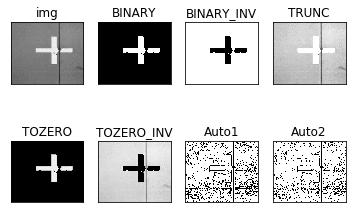

In [2]:
#找適合的二值化方式用
def test_take_cutline():
    #灰階讀入
    img= cv2.imread('Screen/transport/One_000_02.jpg',0)
    #(影像,分類閥值,賦予新值,選擇參數)
    UP=200
    LOWER=160
    ret,thresh1 = cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TRUNC)

    ret,thresh4 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)

    ret,thresh5 = cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO_INV)
    thresh6 = cv2.adaptiveThreshold(img,LOWER,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    thresh7 = cv2.adaptiveThreshold(img,LOWER,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

    #存檔
    cv2.imwrite('Screen/transport/binary/TRUNC05.jpg',thresh3)

    titles = ['img','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','Auto1','Auto2']
    images = [img,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7]
    for i in range(8):
        plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
test_take_cutline()

## 步驟6:算黑色元素(用numpy處理)

In [185]:
#順序，先轉成二值化閥值，僅有0或255，再將影像轉成numpy，之後遍部numpy找尋0(黑色元素)
#並且統計一條黑色元素跟兩條黑色元素的差異，來判斷有切沒切

def find_CuttingLine(file,control):
    #開第5步驟預處理的資料夾

    #讀出資料夾內檔案

    #開檔
    img= cv2.imread(file)
    #取長寬
    #heigh,width,color=img.shape
    img= cv2.imread(file,0)
    #二值化
    ret,image_Trunc = cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
    
    #分左邊右邊，辨識完全黑
    point_left_1=(0,0)
    point_left_2=(605,568)
    crop_left=image_Trunc[point_left_1[1]:point_left_2[1],point_left_1[0]:point_left_2[0]]
    #heigh1,width1=crop_left.shape
    
    point_right_1=(605,0)
    point_right_2=(1210,605)
    crop_right=image_Trunc[point_right_1[1]:point_right_2[1],point_right_1[0]:point_right_2[0]]
    #heigh2,width2=crop_right.shape
    
    count_list=[image_Trunc,crop_left,crop_right]
    name_list=['整張','左邊','右邊']
    sum_list=[]
    for i in range(len(count_list)):
        #計算長寬
        heigh,width=count_list[i].shape
        #宣告放黑色元素array
        Black_Pixel=[]
        #遍部所有pixel，0黑、255白
        for y in range(heigh):
            for x in range(width):
                #取出pixel
                pixel=count_list[i][y,x]
                if pixel>100:
                    pixel=255
                else:
                    pixel=0
                #加到array
                Black_Pixel.append(pixel)
        #合併
        ary=np.array(Black_Pixel)

        #numpy轉圖
        picture=ary.reshape(heigh,width)
        image_binary=Image.fromarray(picture)

        #直接拿dataframe算切割線pixel
        df=pd.DataFrame(picture)
        Shape=df.shape
        total=0
        for row in range(int(0.45*Shape[0]),int(0.55*Shape[0])):
            for column in range(Shape[1]):
                count=(df.iloc[row,column]==0).sum()
                total+=count
        #將結果依序存到list
        sum_list.append(total)
        #print (name_list[i],total)
    #print("==============")
    
    #判斷sum_list[0]整張、sum_list[1]左邊、sum_list[2]右邊

    if sum_list[0]>0:
        #計算差距比率，左右差太多超過50%也要刪
        gap1=sum_list[1]/sum_list[0]
        gap2=sum_list[2]/sum_list[0]
        if gap1>0.8 or gap2>0.8:
            return 0
        #低於門檻要刪
        elif sum_list[0]<3000:
            return 0
        #左右任一邊全黑要刪
        elif sum_list[1]>9000 or sum_list[2]>9000:
            return 0
        else:
            return 1
    #完全沒pixel要刪
    else:
        return 0



    if control==1:
        plt.imshow(image_Trunc,cmap='gray',aspect='auto')
        plt.show()


In [186]:
#Use_function(Image,csv name)

file_list=['one','two']
sub_file_list=['7HAA','7KAA','7LAA','7NAA','7PAA','7QAA','7RAA','7SAA','7TAA','7UAA','7VAA']
save_list=[]
for i in range(len(file_list)):
    for j in range(len(sub_file_list)):
        save_list.clear()
        path='C:\\Users\\2102048\\pythonCV\\Screen\\'+file_list[i]+'\\'+sub_file_list[j]+'\\*'
        file=glob.glob(path +'.jpg')
        for k,f in enumerate(file):
            save=find_CuttingLine(f,0)
            if save==1:
                save_list.append(f)
        #若有重複留最後
        if len(save_list)>1:
            final=save_list[-1]
            save_list.clear()
            save_list.append(final)
        print(file_list[i]+'/'+sub_file_list[j],'資料夾篩選結果',save_list)

one/7HAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7HAA\\One_004.jpg']
one/7KAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7KAA\\One_004.jpg']
one/7LAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7LAA\\One_005.jpg']
one/7NAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7NAA\\One_004.jpg']
one/7PAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7PAA\\One_004.jpg']
one/7QAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7QAA\\One_006.jpg']
one/7RAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7RAA\\One_003.jpg']
one/7SAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7SAA\\One_005.jpg']
one/7TAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7TAA\\One_004.jpg']
one/7UAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7UAA\\One_004.jpg']
one/7VAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\one\\7VAA\\One_005.jpg']
two/7HAA 資料夾篩選結果 ['C:\\Users\\2102048\\pythonCV\\Screen\\two\\7HAA\\Two_003.jpg']
two/7KAA 資料夾篩選結果

In [180]:
name='two/7NAA'
save_list=[]
path='C:\\Users\\2102048\\pythonCV\\Screen\\two\\7NAA\\*'
file=glob.glob(path +'.jpg')
for i,f in enumerate(file):
    save=find_CuttingLine(f,0)
    if save==1:
        save_list.append(f)
print(name+'資料夾篩選結果',save_list)

整張 1320
左邊 1283
右邊 37
整張 2829
左邊 2411
右邊 418
整張 35658
左邊 1300
右邊 34358
two/7NAA資料夾篩選結果 []


In [103]:
def count_CuttingLine(path):
    start_time=time.time()   
    
    df=pd.read_csv(path)
    #(rows*columns)，(422, 501)
    Shape=df.shape
    
    total=0
    for row in range(int(0.45*Shape[0]),int(0.55*Shape[0])):
        for column in range (Shape[1]):
            count=(df.iloc[row,column] == 0).sum()
            total=total+count
    
    print('time:',time.time()-start_time)
    print(total)
    
#Use_function
print('====Cutting_2====')    
count_CuttingLine('C:/Users/2102048/pythonCV/Rubbing_Lenth/Bin.csv')
print('====Cutting_1====')    
count_CuttingLine('C:/Users/2102048/pythonCV/Rubbing_Lenth/Bin2.csv')

====Cutting_2====
time: 1.138761043548584
9498
====Cutting_1====
time: 0.9656612873077393
229


In [ ]:
## 左邊右邊比，再切開來比

## BubbleSort Test(示範)

In [82]:
def bubbleSort(arr): 
    #算array長度
    n = len(arr)  
    #倆倆比對長度減1次
    for i in range(n-1): 
    # 倆倆比對長度減回合減1次
        for j in range(0, n-i-1): 
            # traverse the array from 0 to n-i-1 
            # Swap if the element found is greater 
            # than the next element 
            #if j跟j+1 比較為True 從排隊list刪除，進刪除list 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 


In [83]:
# Driver code to test above 
arr = [64, 34, 25, 12, 22, 11, 90] 
  
bubbleSort(arr) 
  
print ("Sorted array is:") 
for i in range(len(arr)): 
    print ("%d" %arr[i])

Sorted array is:
11
12
22
25
34
64
90


## 步驟7:兩兩過濾相似度比對

In [67]:
#比對等待(等待秒,截圖數量)
def sleep_compare(sec):
    #讀進前面截圖的資料
    filepath='Screen\\Test\\Type1\\'
    myfiles=glob.glob(filepath+'*.jpg')
    #宣告字典
    ImageArray=[]
    for i,f in enumerate(myfiles):
        #放到Arraay排隊
        ImageArray.append(f)
        print("檔案",ImageArray[i])
    #不能用len(Imagelist) 因int是不可以疊帶
    for i in ImageArray:
        #算數量
        count=0
        count+=1
    
    print("檔案",ImageArray)
    try:
        #判斷裡面沒大於2張無法比較
        #if len(ImageArray)<=1:
            #print("End")
        #如果超過兩張就兩兩比較
        if len(ImageArray)>=2:
            print("Start")
            #兩兩拉出 1跟2比，2跟3比，3跟4比
            N=len(ImageArray)-1
            #從i=0，j=0開始
            for  i in range(N):
                    print("///////比對///////",i+1,"次///////////////")
                    print("///////此次///////",ImageArray)
                #判斷裡面沒大於2張無法比較
                    if len(ImageArray)<1:
                        print("End 結束")
                    else:
                        
                        #取檔案順序
                        File1=0
                        File2=1
                        print("比對 開檔",i)

                        #從隊伍撈出來開檔案
                        img1=Image.open(ImageArray[File1])
                        print('//1//',ImageArray[File1])
                        #取檔名
                        File1Name=str(ImageArray[File1]).split("\\")[-1]
                        #停頓
                        #await asyncio.sleep(sec)
                        #img1.show()
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File1]))
                        img2=Image.open(ImageArray[File2])
                        print('//2//',ImageArray[File2])
                        #取檔名
                        File2Name=str(ImageArray[File1]).split("\\")[-1]
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File2]))
                        #img2.show()
                        print("取檔案OK，開始比對圖片")
                        #比對相似度
                        rate=CompareImageII.CompareAlgo(ImageArray[File1],ImageArray[File2])
                        if(rate==True):

                            #RemoveFile=ImageArray[File1]
                            try:
                                #另存檔案
                                #注意斜線
                                img1.save('Screen\\Test\\double\\'+File1Name)
                                ImageArray.remove(str(ImageArray[File1]))
                            except OSError as e:
                                print(e)

                            print("相同 刪除",File1Name)
                        else:
                            ImageArray.remove(str(ImageArray[File1]))
                            ImageArray.remove(str(ImageArray[File2]))
                            print("不相同  刪除",File1," & ",File2)
    except EOFError as e:
        print("檔案錯誤",e)


    print("i結束",i)
                        
                    
    print(ImageArray)
        
        

In [68]:
sleep_compare(1)

檔案 Screen\Test\scan001.jpg
檔案 Screen\Test\scan002.jpg
檔案 Screen\Test\scan003.jpg
檔案 Screen\Test\scan005.jpg
檔案 Screen\Test\scan006.jpg
檔案 Screen\Test\scan007.jpg
檔案 Screen\Test\scan008.jpg
檔案 Screen\Test\scan04.jpg
檔案 ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
Start
///////比對/////// 1 次///////////////
///////此次/////// ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
比對 開檔 0
//1// Screen\Test\scan001.jpg
//2// Screen\Test\scan002.jpg
取檔案OK，開始比對圖片
相同 刪除 scan001.jpg
///////比對/////// 2 次///////////////
///////此次/////// ['Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan